<h4> รายชื่อสมาชิก <br>
นาย ศุภกร ทวีชัยนฤมิตร     <b>61102010164</b> <br>
นาย ศุภวิชญ์ จรัสพรศรีวงศ์ <b>61102010165</b> <br>
นาย กันติวิทย์ สุวัฒนมาลา  <b>61102010418</b> <br>
นาย ณัฐิวุฒิ เอกธาราวงศ์    <b>61102010423</b> <br>
</h4>

# Data Explore

In [55]:
#import library

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
#ทำการอ่านไฟล์
trained_data = pd.read_csv("/content/train_ctrUa4K.csv")
tested_data = pd.read_csv("/content/test_lAUu6dG.csv")

In [57]:
#copy test file ไว้ทำการใส่ค่าจากการทำนายเพื่อสร้างไฟล์ในภายหลัง
tested_data2=tested_data.copy()

In [58]:
#view first 10 rows of training dataset *จะพบว่ามีค่าNaN อยู่ ต้องแก้ไขในภายหลัง*
trained_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [59]:
#view first 10 rows of tested dataset *จะพบว่ามีค่าNaN อยู่ ต้องแก้ไขในภายหลัง*
tested_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [60]:
#show shape for each datasets
trained_data.shape , tested_data.shape

((614, 13), (367, 12))

In [61]:
#ดูจำนวนข้อมูลและตัวที่มีค่า NaN ใน train data
trained_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Exploratory Data Analysis (EDA)






In [62]:
# นับจำนวน Loan_Status column 

trained_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

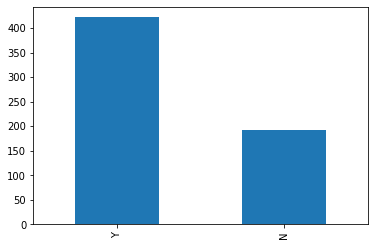

In [63]:
#Count AND Plot Loan_Status's column value
#จะพบว่า422คนจะได้รับการอนุมัติ
trained_data['Loan_Status'].value_counts().plot.bar()

## พิจารณาตัวแปรอิสระ ประเภทCategorical

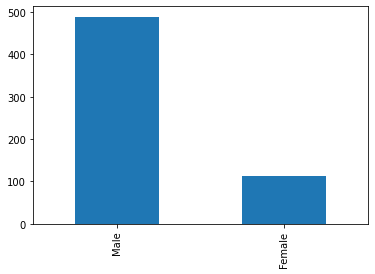

In [64]:
trained_data["Gender"].value_counts().plot.bar()
plt.show()
#จะพบว่าส่วนใหญ่ที่สมัครจะเป็นผู้ชาย

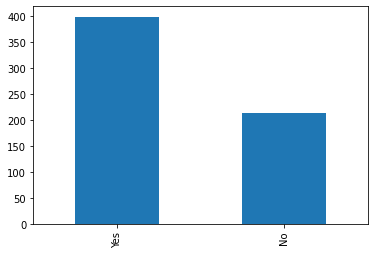

In [65]:
trained_data["Married"].value_counts().plot.bar()
plt.show()
#จะพบว่าส่วนใหญ่ที่สมัครจะเป็นผู้ที่แต่งงานแล้ว

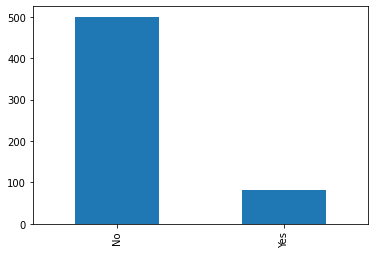

In [66]:
trained_data["Self_Employed"].value_counts().plot.bar()
plt.show()
#จะพบว่าส่วนน้อยจะเป็นพวก self_employed

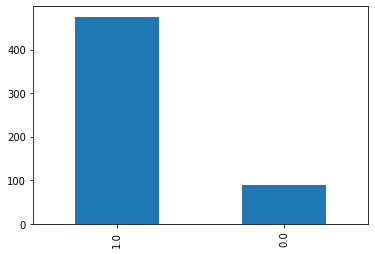

In [67]:
trained_data['Credit_History'].value_counts().plot.bar()
plt.show()
#จะพบว่าส่วนใหญ่ที่สมัครจะเป็นผู้ที่มีเครดิต

## พิจารณาตัวแปรอิสระ ประเภทOrdinal

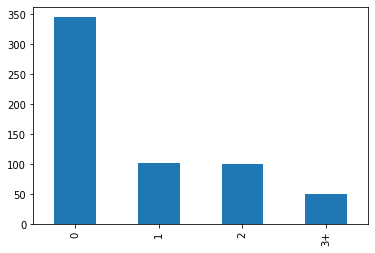

In [68]:
trained_data['Dependents'].value_counts().plot.bar()
plt.show()
#ผู้สมัคร ไม่มีdependents มากกว่าครึ่ง

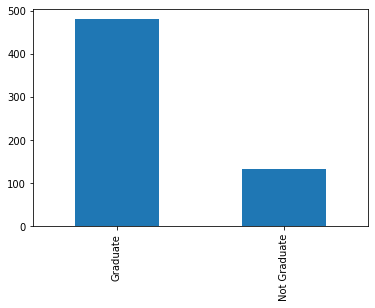

In [69]:
trained_data['Education'].value_counts().plot.bar()
plt.show()
#ผู้สมัครส่วนใหญ่จบการศึกษา

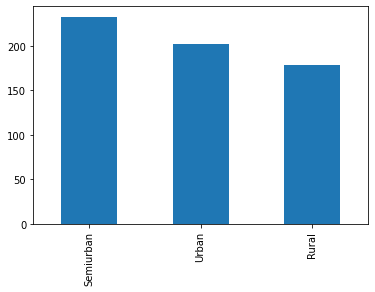

In [70]:
trained_data['Property_Area'].value_counts().plot.bar()
plt.show()
#ผู้สมัครส่วนใหญ่มาจาก Semiurban

## พิจารณาตัวแปรอิสระ ประเภทNumeric

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


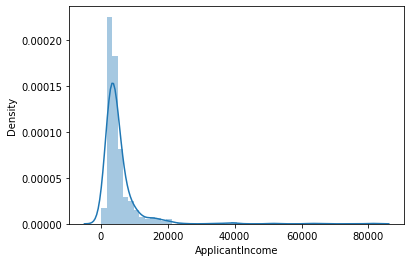

In [71]:
sns.distplot(trained_data['ApplicantIncome'])
plt.show()
#ApplicantIncome is not normally distributed

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


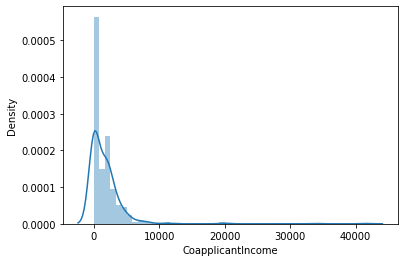

In [72]:
sns.distplot(trained_data['CoapplicantIncome'])
plt.show()
#CoapplicantIncome is not normally distributed

In [73]:
trained_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


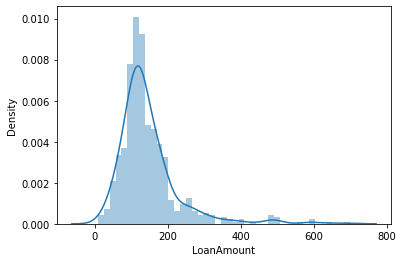

In [74]:
sns.distplot(trained_data['LoanAmount'])
plt.show()
#LoanAmount  มีค่า outliers ค่อนข้างมาก

##Bivariate (Relation of Independent Variable vs Target Variable)



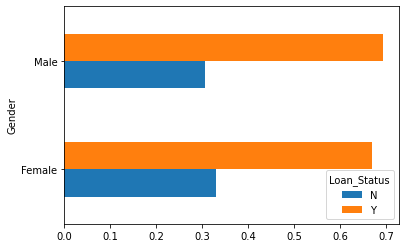

In [75]:
Gen=pd.crosstab(trained_data["Gender"],trained_data["Loan_Status"])
Gen.div(Gen.sum(1).astype(float), axis=0).plot(kind="barh")
plt.show()
#สัดส่วนการอนุมัติและการไม่อนุมัติมีค่าใกล้เคียงกันมาก เมื่อเทียบกับเพศ

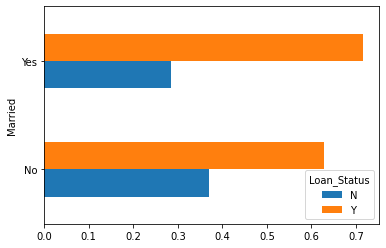

In [76]:
Married=pd.crosstab(trained_data["Married"],trained_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='barh')
plt.show()
#สัดส่วนการอนุมัติและการไม่อนุมัติมีค่าต่างกันเล็กน้อย เมื่อเทียบกับผู้ที่แต่งงานแล้วกับยังไม่แต่งงาน

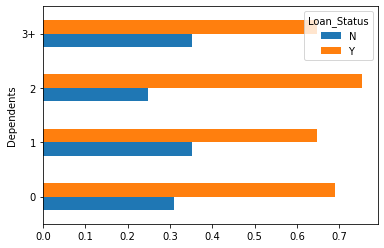

In [77]:
Dependents=pd.crosstab(trained_data['Dependents'],trained_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='barh')
plt.show()
#สัดส่วนการอนุมัติและการไม่อนุมัติมีค่าต่างกันแบบหลากลาย เมื่อเทียบกับเงินได้ในส่วนของผู้อยู่ในอุปการะ

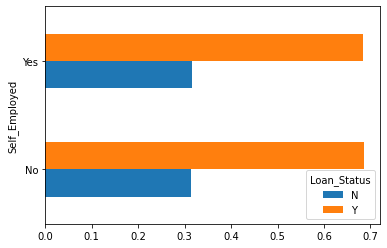

In [78]:
Self_Employ=pd.crosstab(trained_data['Self_Employed'],trained_data['Loan_Status'])
Self_Employ.div(Self_Employ.sum(1).astype(float), axis=0).plot(kind='barh')
plt.show()
#สัดส่วนการอนุมัติและการไม่อนุมัติมีค่าใกล้เคียงกันมาก เมื่อเทียบกับรายได้แบบ Self Employed

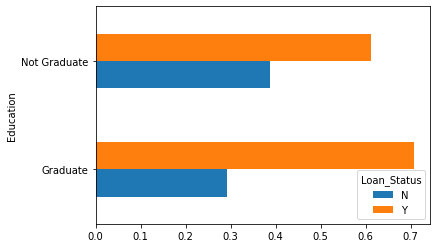

In [79]:
Edu=pd.crosstab(trained_data['Education'],trained_data['Loan_Status'])
Edu.div(Edu.sum(1).astype(float), axis=0).plot(kind='barh')
plt.show()
#สัดส่วนการอนุมัติและการไม่อนุมัติมีค่าต่างกันเล็กน้อย เมื่อเทียบกับการสำเร็จการศึกษา

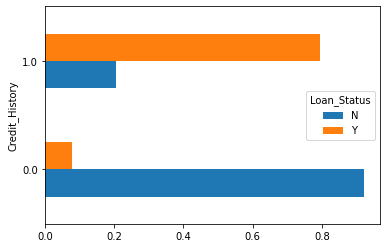

In [80]:
CreditHis=pd.crosstab(trained_data["Credit_History"],trained_data['Loan_Status'])
CreditHis.div(CreditHis.sum(1).astype(float), axis=0).plot(kind='barh')
plt.show()
#สัดส่วนการอนุมัติและการไม่อนุมัติมีค่าต่างกันอย่างมาก เมื่อเทียบกับประวัติการใช้งาน

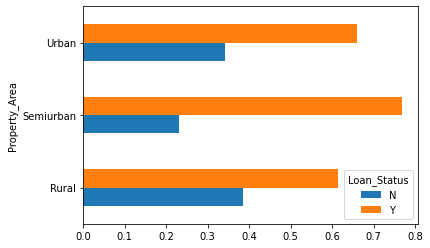

In [81]:
PropertyArea=pd.crosstab(trained_data["Property_Area"],trained_data['Loan_Status'])
PropertyArea.div(PropertyArea.sum(1).astype(float), axis=0).plot(kind='barh')
plt.show()
#สัดส่วนการอนุมัติและการไม่อนุมัติมีค่าต่างกันอย่างมาก เมื่อเทียบกับพื้นที่ที่อาศัย

## Numerical (Independent Variable vs Target Variable)

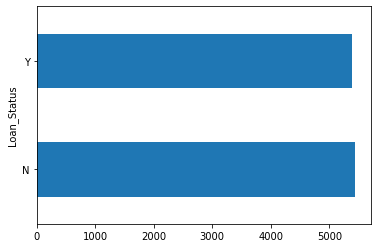

In [82]:
#grouped data by Loan_Status and ApplicantIncome
#เพื่อเปรียบเทียบ พบว่ารายได้ของผู้ที่ได้การอนุมัติกับรายได้ของผู้ที่ไม่ได้รับการอนุมัติ มีค่าไม่ต่างกัน

trained_data.groupby("Loan_Status")["ApplicantIncome"].mean().plot(kind="barh")

# Impute Missing Value

## Impute Missing Value for train data


In [83]:
#เช็คค่าที่ Null
trained_data.isnull().head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
#นับค่าที่ Null ทั้งหมดในแต่ละcolumn ของตัว trained_data
trained_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [85]:
#ทำการแก้ missing value ของตัวแปรประเภท category ด้วย mode

trained_data['Gender'].fillna(trained_data['Gender'].mode()[0], inplace=True)
trained_data['Married'].fillna(trained_data['Married'].mode()[0], inplace=True)
trained_data['Dependents'].fillna(trained_data['Dependents'].mode()[0], inplace=True)
trained_data['Self_Employed'].fillna(trained_data['Self_Employed'].mode()[0], inplace=True)
trained_data['Credit_History'].fillna(trained_data['Credit_History'].mode()[0], inplace=True)
trained_data['Loan_Amount_Term'].fillna(trained_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [86]:
#เช็คค่า Null อีกรอบพบว่า LoanAmount ยังNullอยู่ ซึ่งเราจะแทนด้วยค่า Median
trained_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [87]:
#หาค่า median จาก LoanAmount
trained_data['LoanAmount'].median()

128.0

In [88]:
#ทำการแก้ missing value ของตัวแปรประเภท numeric ด้วย median
trained_data['LoanAmount'].fillna(trained_data['LoanAmount'].median(), inplace=True)

In [89]:
#check Null value  จะพบว่าไม่มีแล้วพร้อมต่อการสร้างmodel
trained_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Impute Missing Value for test data


In [90]:
#เช็คค่าที่ Null
tested_data.isnull().head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
#นับค่าที่ Null ทั้งหมดในแต่ละcolumn ของตัว tested_data
tested_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [92]:
#ทำการแก้ missing value ของตัวแปรประเภท category ด้วย mode

tested_data['Gender'].fillna(tested_data['Gender'].mode()[0], inplace=True)
tested_data['Married'].fillna(tested_data['Married'].mode()[0], inplace=True)
tested_data['Dependents'].fillna(tested_data['Dependents'].mode()[0], inplace=True)
tested_data['Self_Employed'].fillna(tested_data['Self_Employed'].mode()[0], inplace=True)
tested_data['Credit_History'].fillna(tested_data['Credit_History'].mode()[0], inplace=True)
tested_data['Loan_Amount_Term'].fillna(tested_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [93]:
#เช็คค่า Null อีกรอบพบว่า LoanAmount ยังNullอยู่ ซึ่งเราจะแทนด้วยค่า Median
tested_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [94]:
#หาค่า median จาก LoanAmount
tested_data['LoanAmount'].median()

125.0

In [95]:
#ทำการแก้ missing value ของตัวแปรประเภท numeric ด้วย median
tested_data['LoanAmount'].fillna(trained_data['LoanAmount'].median(), inplace=True)

In [96]:
#Check Null value จะพบว่าไม่มีแล้วพร้อมต่อการสร้างmodel
tested_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Model Building


In [97]:
trained_data=trained_data.drop('Loan_ID',axis=1)
tested_data=tested_data.drop('Loan_ID',axis=1)
#ทำการdrop column Loan_ID ทิ้งเพราะเราไม่ได้ใช้ในการพิจารณา

In [98]:
X = trained_data.drop('Loan_Status',1)
y = trained_data.Loan_Status

In [99]:
X = pd.get_dummies(X)
trained_data=pd.get_dummies(trained_data)
tested_data=pd.get_dummies(tested_data)
#ทำการสร้างตัวแปร dummy 

In [100]:
X.shape, trained_data.shape, tested_data.shape

((614, 20), (614, 22), (367, 20))

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.35)
#ทำการแบ่ง train dataset , test dataset โดยแบ่งสัดส่วนเป็น test 35 % , train 65%

In [102]:
#import library ต่างๆที่ต้องใช้
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score

## Tunning Model

In [103]:
# เหตุผลที่ใช้ model XGBoost เพราะสามารถใช้ hardwareได้อย่างมีประสิทธิภาพ ,สามารถลดการเกิดoverfitได้ และ มีประสิทธิภาพในการ perdictได้สูง

# ใช้ n_splits=15 ทำการแบ่งข้อมูลเป็น 14-16 ส่วน ค่านี้จะเป็นค่าที่ดีที่สุดในการปรับ เพราะทำให้ได้ค่าคะแนนจากการทำนายที่สูง ถ้าเพิ่มค่าจะได้คะแนนตํ่าลงและถ้าลดค่าก็ทำให้คะแนนตํ่าลง

# random_state=5 ให้ทำการสุ่มทีละ 5 ตัวจะได้คะแนนที่สูงที่สุด เมื่อปรับเป็นเลขอื่นจะทำให้คะแนนจากการทำนายน้อยลงไปด้วย

# shuffle=True ทำการสุ่มเลขโดยใช้การเรียงลำดับ

# n_estimators=70 ได้ปรับจำนวนที่สามารถทำให้scoreสูงที่สุด จะอยู่ในช่วง 70-85 เป็นช่วงที่ทำให้perfomanceดีขึ้น และช่วงนั้นทำให้performanceเริ่มนิ่งแล้ว

# max_depth=4 ความลึกของtree เมื่อปรับที่ 4 จะทำให้ได้ประสิทธิภาพสูงที่สุด 


In [104]:
from xgboost import XGBClassifier
j=1 
mean = 0
kf = StratifiedKFold(n_splits=15,random_state=5,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
 xtr,xts = X.loc[train_index],X.loc[test_index] 
 ytr,yts = y[train_index],y[test_index] 
 model = XGBClassifier(n_estimators=70, max_depth=3) 
 model.fit(xtr, ytr) 
 pred_test = model.predict(xts) 
 score = accuracy_score(yts,pred_test) 
 mean += score
 j+=1
 pred_test = model.predict(tested_data)
 pred = model.predict_proba(xts)[:,1]
print ('\n Mean Validation Accuracy',mean/(j-1))
print(pred_test)



 Mean Validation Accuracy 0.7980894308943091
['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 

In [105]:
#นำค่าที่ได้มา predictกับตัวtest data เพื่อหา accuracy score
pred_cv = model.predict(x_test)
accuracy_score(y_test,pred_cv)

0.8418604651162791

In [106]:
#ทำการสร้างไฟล์ โดยใช้columnของ'Loan_ID','Loan_Status เพื่อทำการไปcheck score ในเว็ป
submissionfile = pd.read_csv('sample_submission.csv')

In [107]:
submissionfile['Loan_Status']=pred_test
submissionfile['Loan_ID']=tested_data2['Loan_ID']
submissionfile['Loan_Status'].replace(0, 'N', inplace=True)
submissionfile['Loan_Status'].replace(1, 'Y', inplace=True)

In [108]:
pd.DataFrame(submissionfile, columns=['Loan_ID','Loan_Status']).to_csv('/content/test_score_last.csv', index=False)